# Imports

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# Set visualization style
sns.set_theme(style="whitegrid")

# Data

## Reading

In [2]:
def read_data(file_path, index_col=None):
    """
    Read data from CSV or Excel file and drop unnecessary columns.
    
    Returns:
    - df (DataFrame): Filtered DataFrame.
    - headers (list): List of column headers.
    """
    if file_path.endswith('.xlsx'):
        df = pd.read_excel(file_path, index_col=index_col)
    elif file_path.endswith('.csv'):
        df = pd.read_csv(file_path, index_col=index_col)
    else:
        raise ValueError("Unsupported file format. Please provide a .csv or .xlsx file.")
    
    return df

In [4]:
file_path = "../../../data/etp-bermant.csv"

df = read_data(file_path, index_col= 'CodaNum')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16995 entries, 1 to 20142930
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   FullDateTime  16995 non-null  object 
 1   ClanNum       16855 non-null  float64
 2   ClanName      16855 non-null  object 
 3   NumClicks     16995 non-null  int64  
 4   TotalDur      16995 non-null  float64
 5   ICI1          16995 non-null  float64
 6   ICI2          16995 non-null  float64
 7   ICI3          16995 non-null  float64
 8   ICI4          16995 non-null  float64
 9   ICI5          16995 non-null  float64
 10  ICI6          16995 non-null  float64
 11  ICI7          16995 non-null  float64
 12  ICI8          16995 non-null  float64
 13  ICI9          16995 non-null  float64
 14  ICI10         16995 non-null  float64
 15  ICI11         16995 non-null  float64
 16  Coda Type     16993 non-null  float64
dtypes: float64(14), int64(1), object(2)
memory usage: 2.3+ MB


## Missing Values

In [5]:
print(df.isnull().sum())

FullDateTime      0
ClanNum         140
ClanName        140
NumClicks         0
TotalDur          0
ICI1              0
ICI2              0
ICI3              0
ICI4              0
ICI5              0
ICI6              0
ICI7              0
ICI8              0
ICI9              0
ICI10             0
ICI11             0
Coda Type         2
dtype: int64


# Numerical Data Analysis

In [6]:
def get_date(date_string: str):
    date_string = date_string.split(' ')[0]
    if date_string.find('-') == 4:
        date_string = date_string[-2:] + '-' + date_string[5: 7] + '-' + date_string[:4]
    return date_string

In [10]:
# Identify numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("Numerical Columns:", numerical_cols)

Numerical Columns: ['ClanNum', 'NumClicks', 'TotalDur', 'ICI1', 'ICI2', 'ICI3', 'ICI4', 'ICI5', 'ICI6', 'ICI7', 'ICI8', 'ICI9', 'ICI10', 'ICI11', 'Coda Type']


## Statistics

In [11]:
df[numerical_cols].describe()

,ClanNum,NumClicks,TotalDur,ICI1,ICI2,ICI3,ICI4,ICI5,ICI6,ICI7,ICI8,ICI9,ICI10,ICI11,Coda Type
count,16855.000000,16995.000000,16995.000000,16995.000000,16995.000000,16995.000000,16995.000000,16995.000000,16995.000000,16995.000000,16995.000000,16995.000000,16995.000000,16995.000000,16993.000000
mean,3.180125,5.605766,1.087052,0.226622,0.230017,0.190764,0.171767,0.107026,0.069991,0.039985,0.018703,0.010739,0.005569,0.003279,496.378332
std,2.115048,2.186366,0.885635,0.138978,0.136927,0.163043,0.190247,0.189518,0.152144,0.105625,0.073963,0.058113,0.042572,0.031564,284.157633
min,1.000000,3.000000,0.076396,0.004240,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,31.000000
25%,1.000000,4.000000,0.636000,0.148000,0.149000,0.107000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,399.000000
50%,2.000000,5.000000,0.834000,0.192000,0.197000,0.175000,0.159000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,599.000000
75%,5.000000,7.000000,1.312500,0.276000,0.280000,0.239000,0.218000,0.175300,0.098792,0.000000,0.000000,0.000000,0.000000,0.000000,599.000000
max,6.000000,29.000000,68.118000,1.544000,1.760000,1.730000,1.800000,1.730000,1.660000,1.450000,1.700000,1.230000,1.030000,0.860000,1199.000000


## Histograms

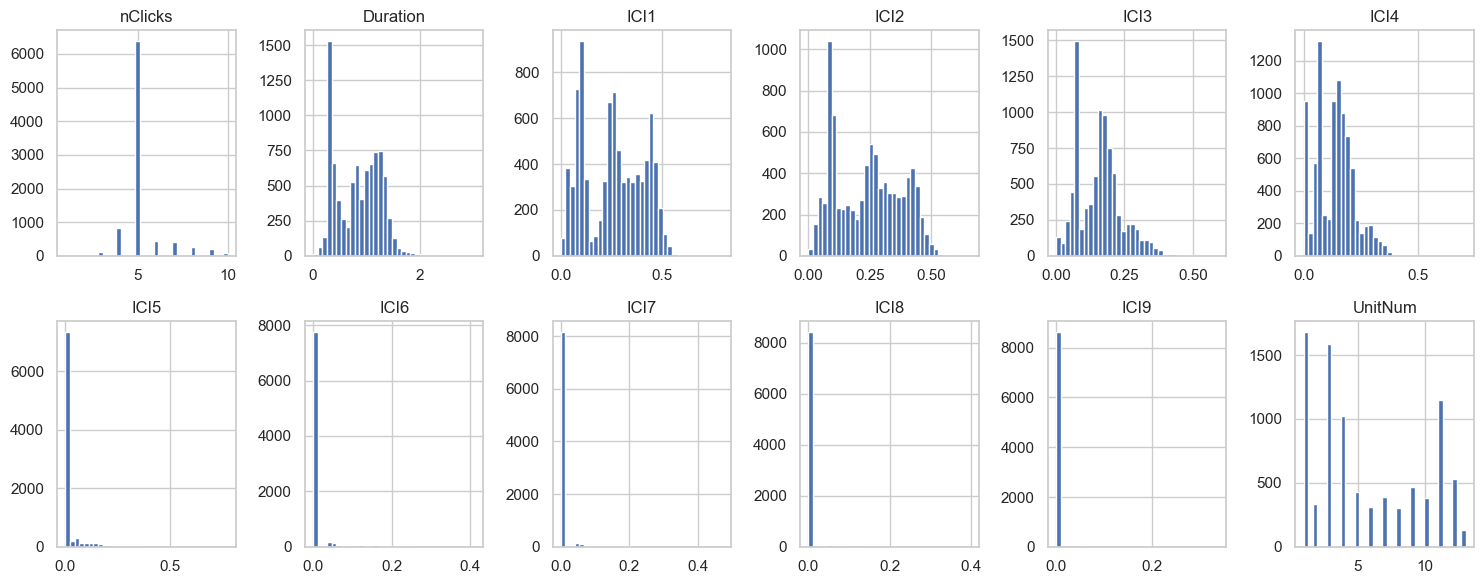

In [22]:
df[numerical_cols].hist(bins=35, figsize=(15, 6), layout=(2, len(numerical_cols)//2))
plt.tight_layout()
plt.show()

> Мы ничего не можем понять имея только данные о ICI-X.
>
> Что такое ICI - inter-click-information, или же “сколько времени между текущим и следующим кликом”. В отрыве от остальных данных по типу CodaType, ClanType, Unit и тд, время между кликами не дает ничего. Каждый ICI должен рассматриваться внутри определенных условий.

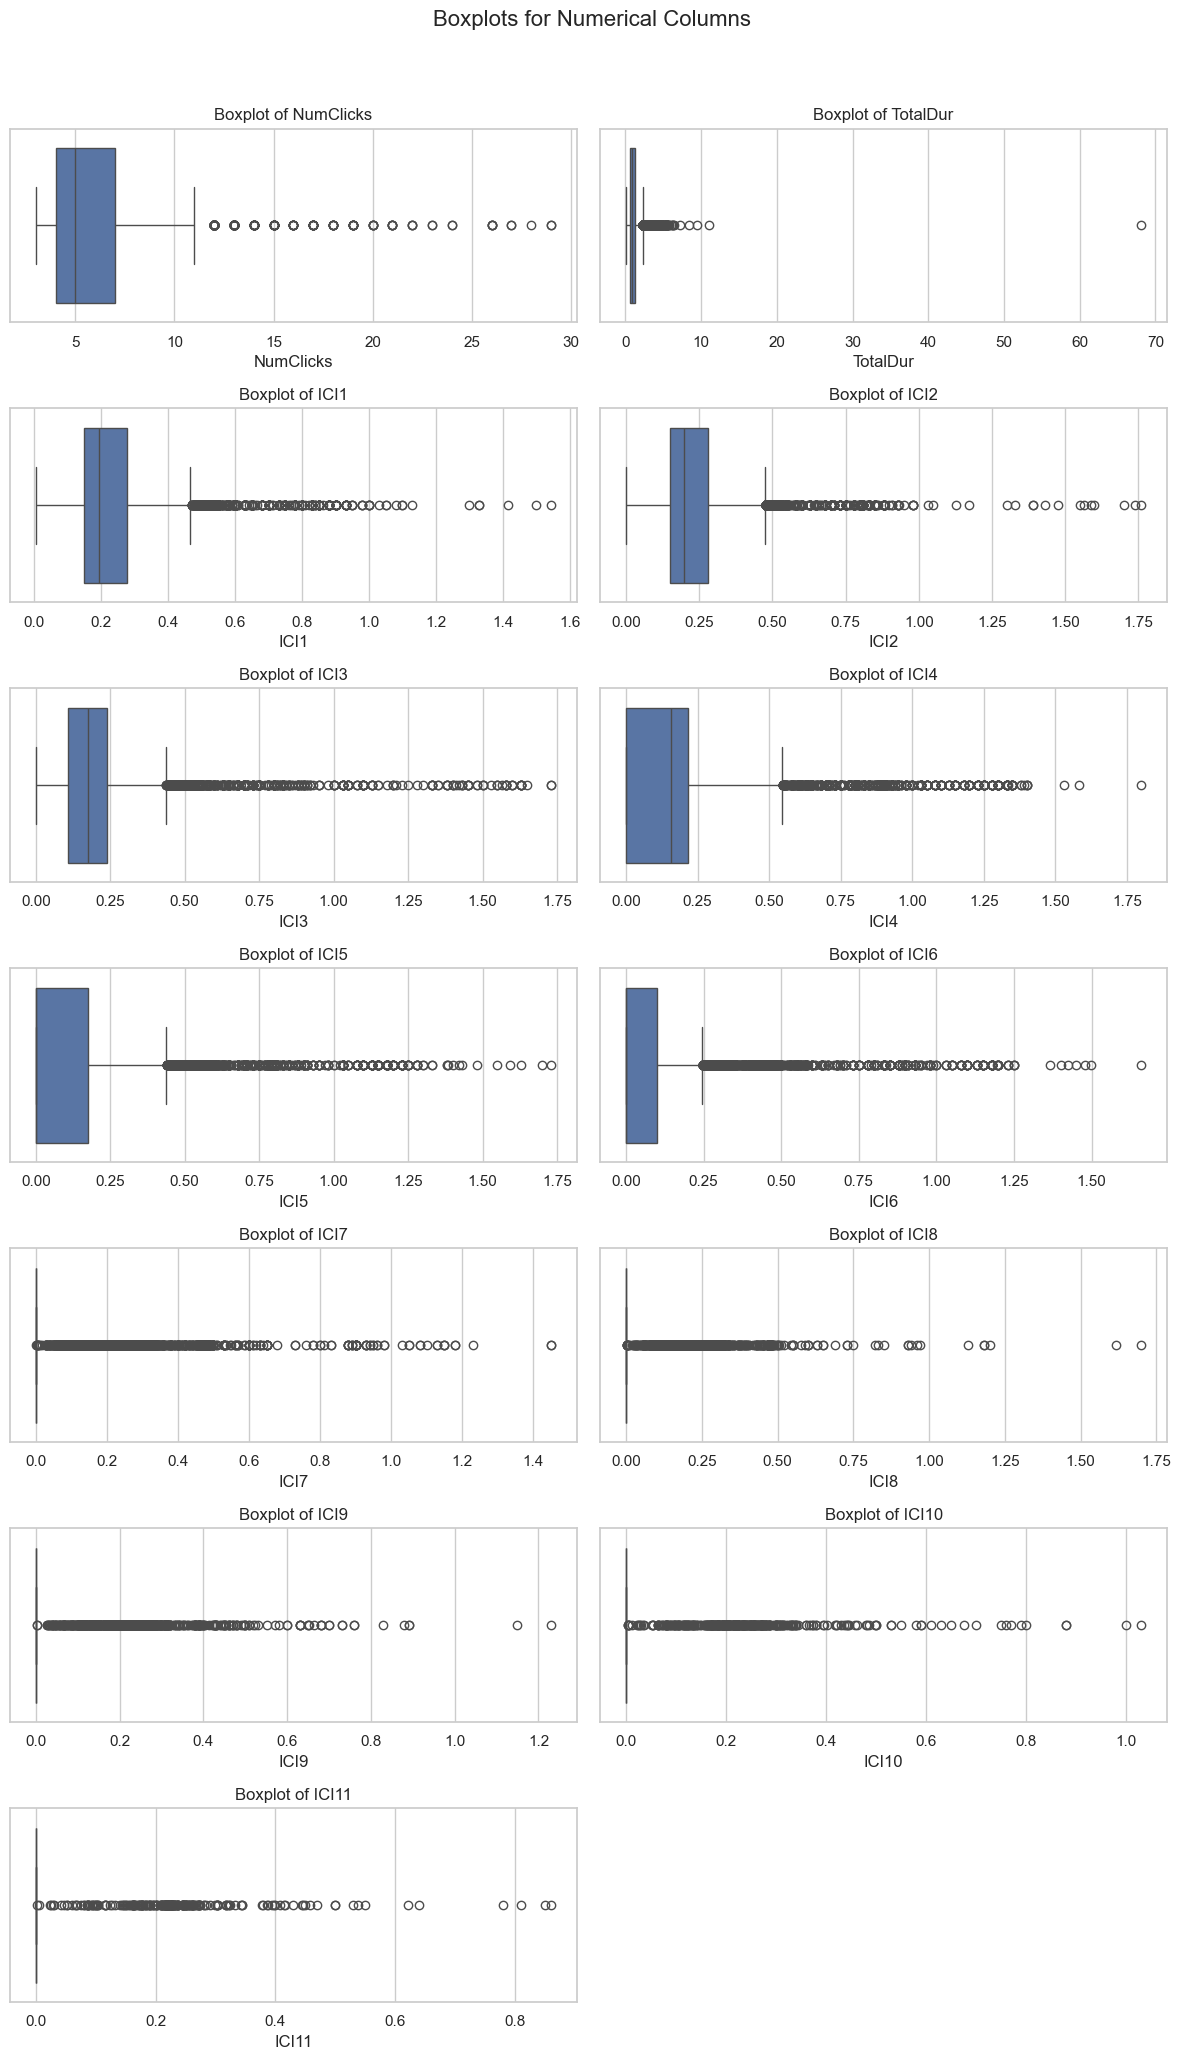

In [12]:
n_cols = 2
n_rows = (len(numerical_cols[1:-1]) + 1) // n_cols  # Calculate the necessary rows

# Set up the figure with subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows * 3))  # Adjust size as needed
fig.suptitle('Boxplots for Numerical Columns', fontsize=16)

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot each column in a separate subplot
for i, col in enumerate(numerical_cols[1:-1]):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')

# Hide any remaining empty subplots
for j in range(i + 1, n_rows * n_cols):
    axes[j].set_visible(False)

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit titles
plt.show()

> Очевидно, что боксплоты показывают столько аутлаеров, потому что ICI-X внутри каждой коды уникален.

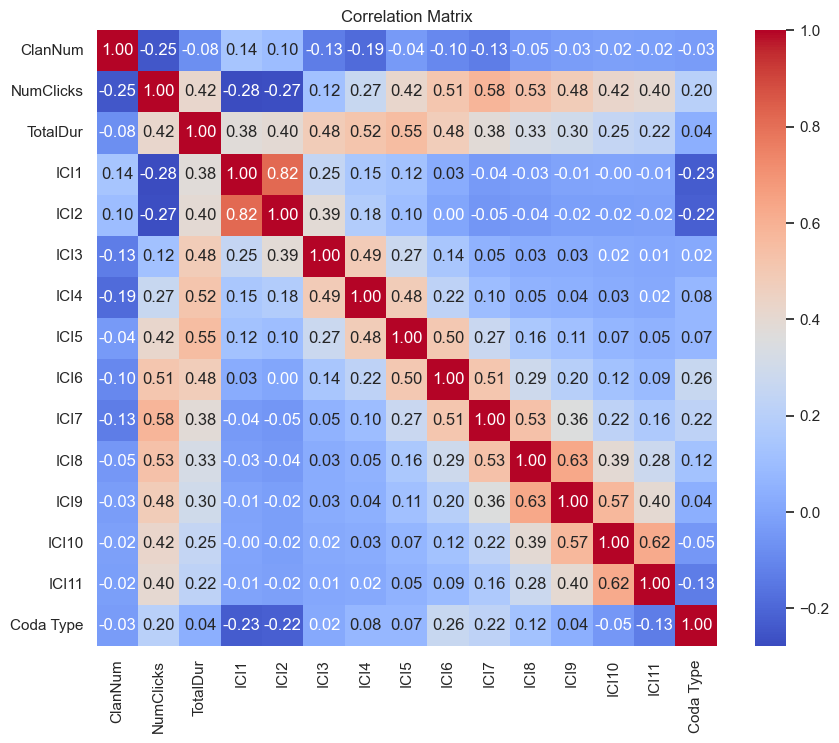

In [13]:
# Correlation matrix
plt.figure(figsize=(10, 8))
corr_matrix = df[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

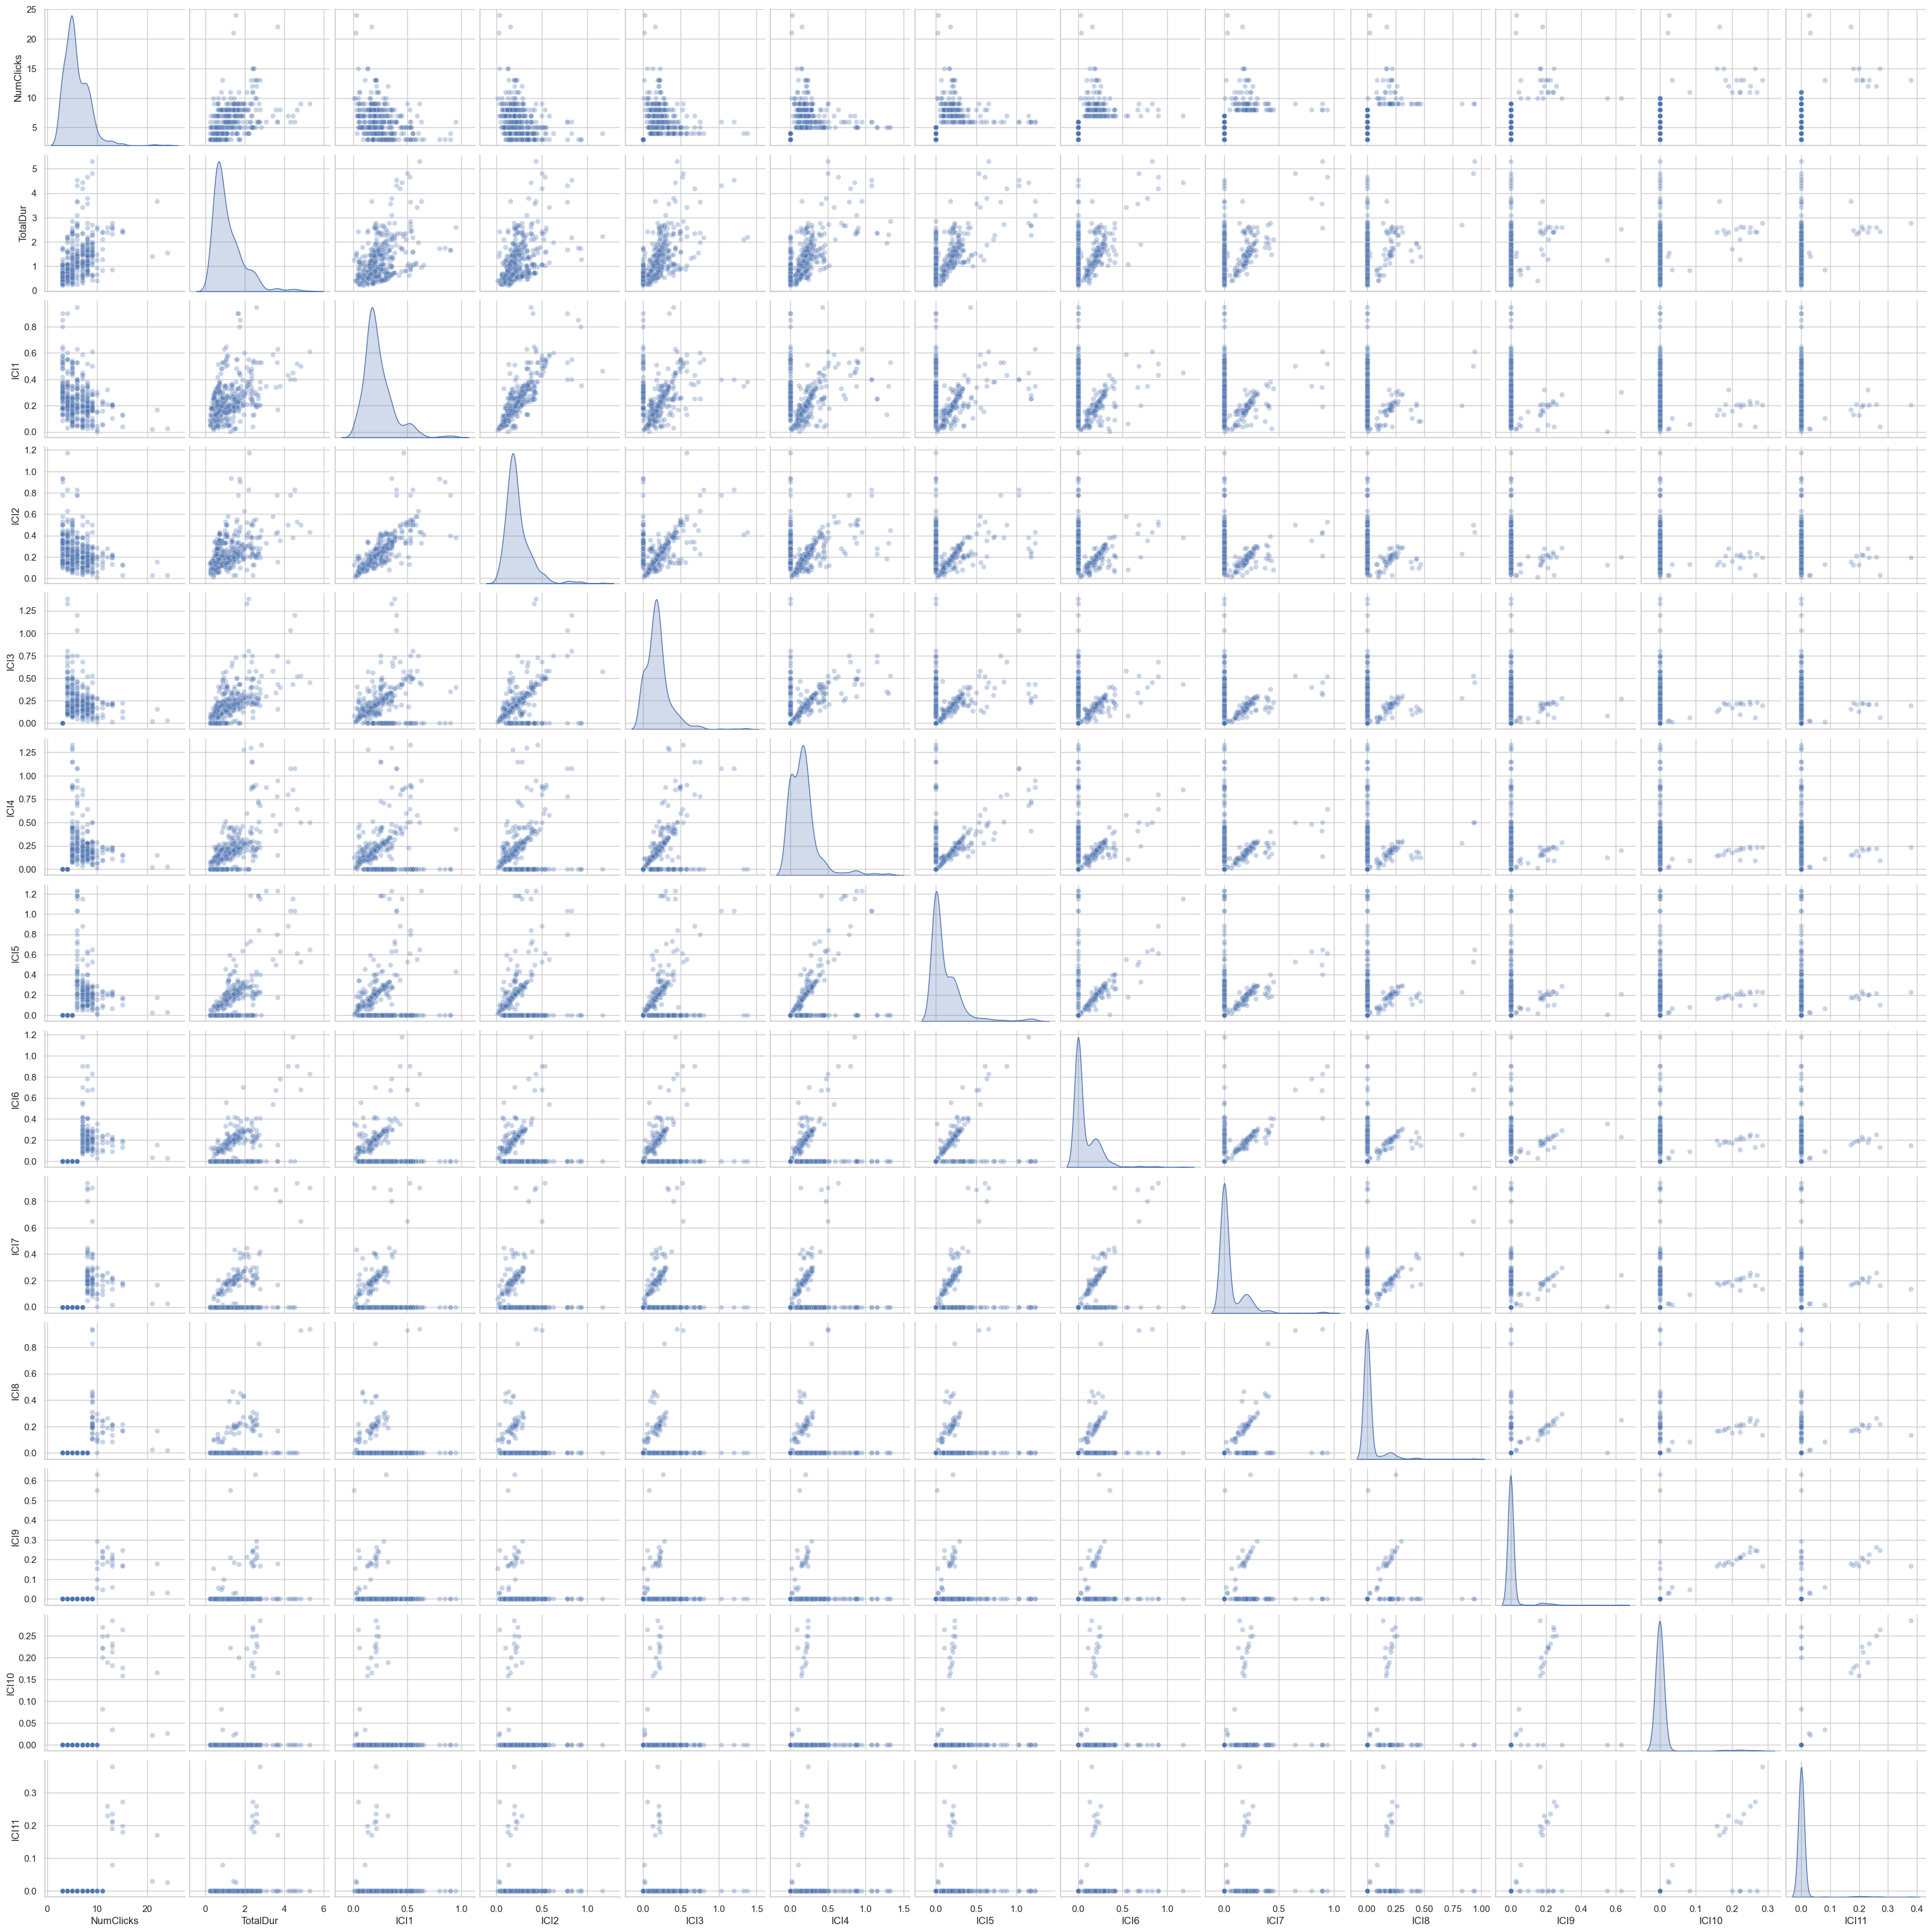

In [14]:
sampled_df = df[numerical_cols[1:-1]].dropna().sample(n=500) if len(df) > 500 else df[numerical_cols[1:-1]].dropna()

pairplot = sns.pairplot(sampled_df, diag_kind="kde", plot_kws={'alpha': 0.3})  # Lower alpha for scatter plots
plt.show()

> И снова корреляция ничего не показывает. Рассмотри дальше

# Categorical Data Analysis

In [15]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
print("\nCategorical Columns:", categorical_cols)


Categorical Columns: ['FullDateTime', 'ClanName']


In [16]:
for col in categorical_cols:
    print(f"\nValue counts for {col}:\n", df[col].value_counts())


Value counts for FullDateTime:
 FullDateTime
2014-05-16 22:00:46    12
2014-05-16 22:00:54    12
2013-02-15 13:15:53    10
2014-05-16 22:01:12    10
2014-05-16 22:00:28    10
                       ..
06/03/1987 12:06:41     1
06/03/1987 12:07:06     1
06/03/1987 12:07:14     1
06/03/1987 12:07:19     1
02/23/1985 12:04:21     1
Name: count, Length: 13717, dtype: int64

Value counts for ClanName:
 ClanName
Regular      6955
Short        4603
FourPlus     3083
PlusOne      1586
Caribbean     476
Tonga         152
Name: count, dtype: int64


In [17]:
n_cols = 2
n_rows = (len(categorical_cols) + 1) // n_cols  # Calculate rows needed based on number of columns

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
fig.suptitle('Bar Plots for Categorical Columns', fontsize=16)

axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, ax=axes[i])
    axes[i].set_title(f'Count Plot of {col}')
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-ticks for readability

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to prevent title overlap
plt.show()

KeyboardInterrupt: 

In [ ]:
n_cols = len(categorical_cols)
n_rows = len(numerical_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 5))
fig.suptitle('Box Plots of Numerical Columns by Categorical Columns', fontsize=16)

for row_idx, num_col in enumerate(numerical_cols):
    for col_idx, cat_col in enumerate(categorical_cols):
        ax = axes[row_idx, col_idx]
        sns.boxplot(x=cat_col, y=num_col, data=df, ax=ax)
        ax.set_title(f'{num_col} by {cat_col}')
        ax.tick_params(axis='x', rotation=45)  # Rotate x-ticks for readability

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the main title
plt.show()

KeyboardInterrupt: 